170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9366 - loss: 0.1439 - val_accuracy: 0.9864 - val_loss: 0.0333
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9886 - loss: 0.0293 - val_accuracy: 0.9795 - val_loss: 0.0436
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9912 - loss: 0.0223 - val_accuracy: 0.9948 - val_loss: 0.0147
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9940 - loss: 0.0154 - val_accuracy: 0.9882 - val_loss: 0.0242
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9939 - loss: 0.0157 - val_accuracy: 0.9966 - val_loss: 0.0100
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0120 - val_accuracy: 0.9925 - val_loss: 0.0156
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9964 - loss: 0.0097 - val_accuracy: 0.9981 - val_loss: 0.0071
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━

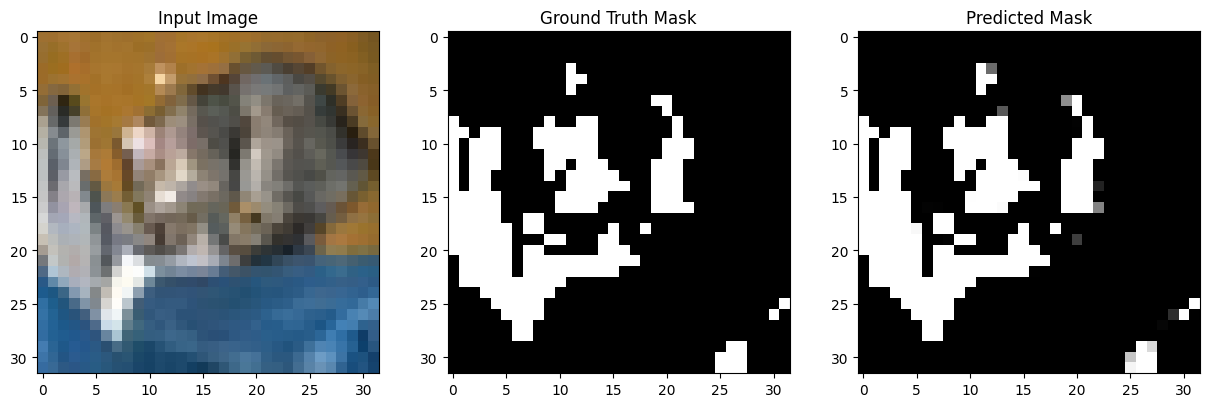

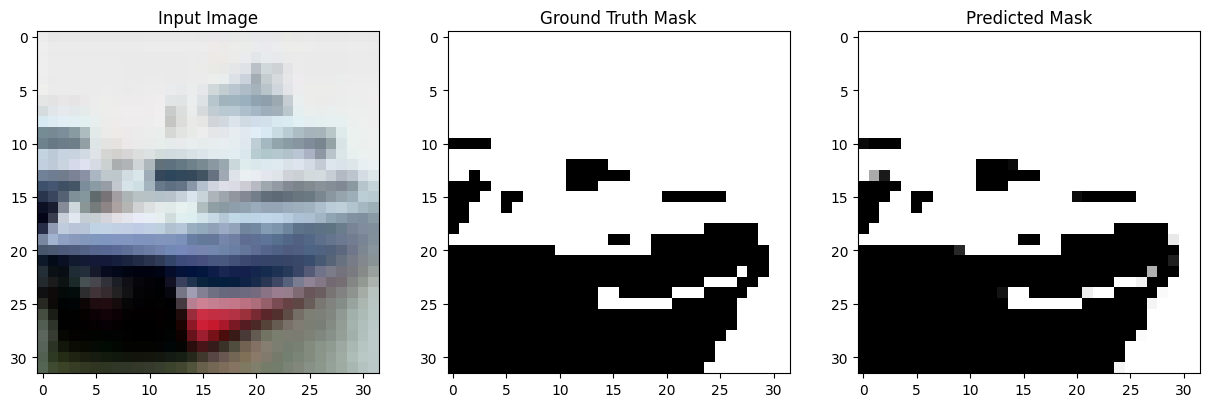

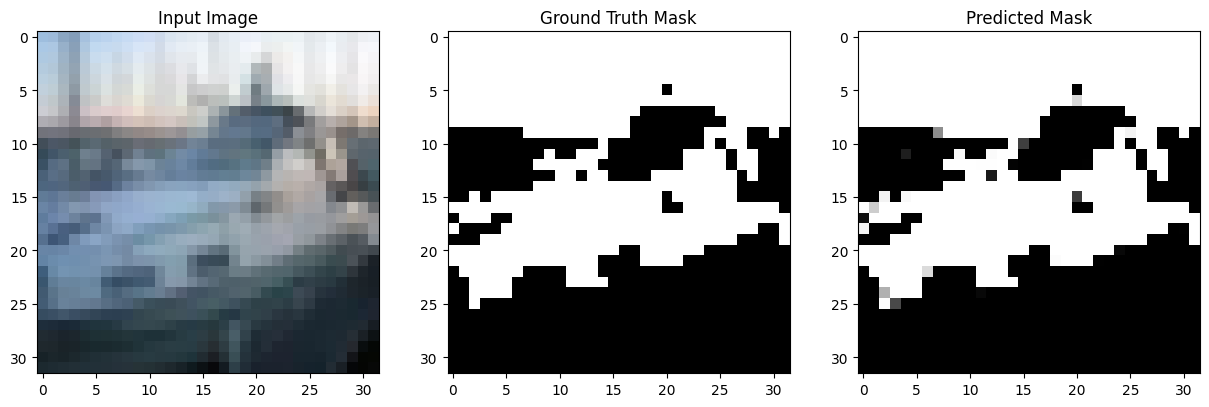

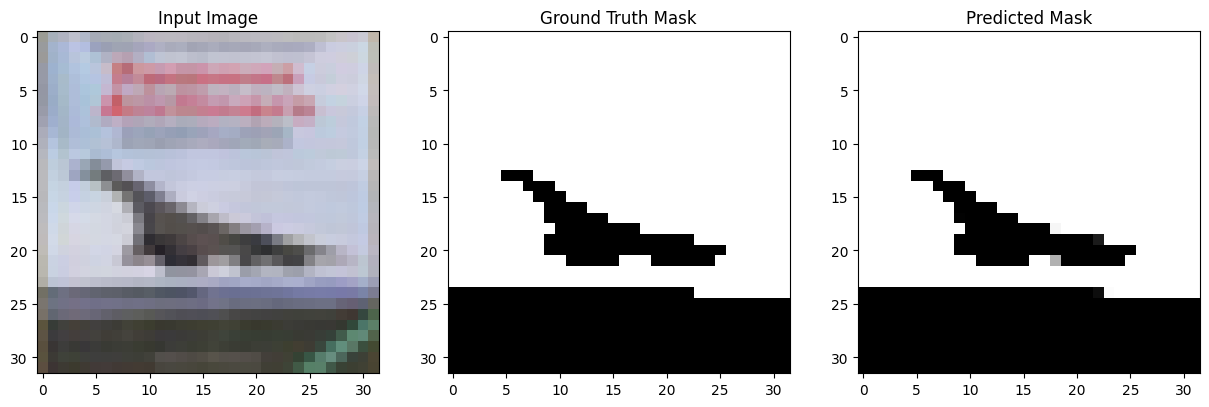

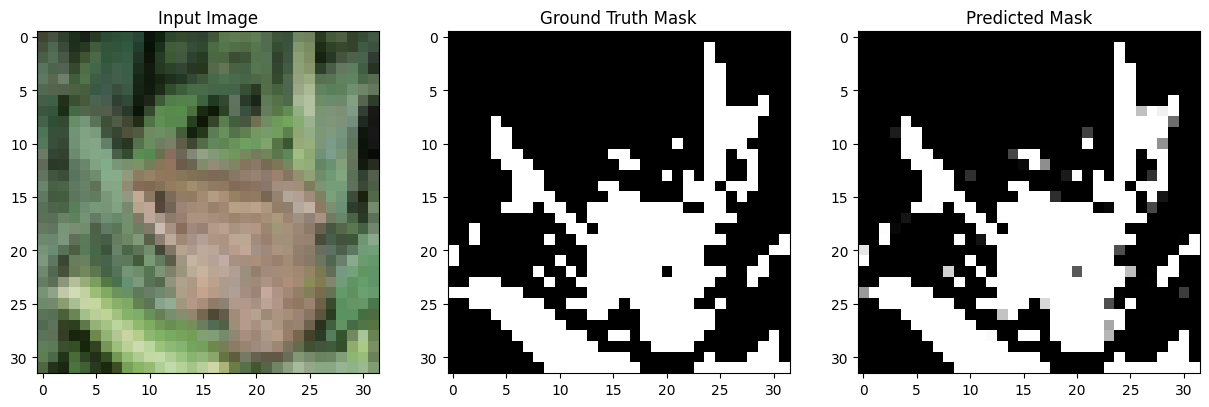

In [ ]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_seg = (x_train.mean(axis=-1) > 0.5).astype(int)
y_test_seg = (x_test.mean(axis=-1) > 0.5).astype(int)

y_train_seg = y_train_seg[:, :, :, np.newaxis]
y_test_seg = y_test_seg[:, :, :, np.newaxis]

def unet_model(input_size=(32, 32, 3)):
    inputs = Input(input_size)

    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    u1 = UpSampling2D((2, 2))(c3)
    m1 = concatenate([u1, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(m1)

    u2 = UpSampling2D((2, 2))(c4)
    m2 = concatenate([u2, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(m2)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    return Model(inputs, outputs)

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    x_train, y_train_seg,
    validation_data=(x_test, y_test_seg),
    epochs=10, batch_size=32
)

pred = model.predict(x_test[:5])

for i in range(5):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(x_test[i])

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(y_test_seg[i].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(pred[i].squeeze(), cmap='gray')

    plt.show()
